In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/user-behavior-on-instagram/comments_cleaned.csv


In [2]:
import pandas as pd

# Define file path
file_path = os.path.join('/kaggle/input/user-behavior-on-instagram/comments_cleaned.csv')

# Load the data into a pandas DataFrame
df_comments = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_comments.head()


,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [3]:
# Preliminary data exploration

# 1. Check the overall size of the dataset
num_comments = df_comments.shape[0]

# 2. Look at the distribution of comments per user and per photo
comments_per_user = df_comments['User  id'].value_counts()
comments_per_photo = df_comments['Photo id'].value_counts()

# 3. Examine the distribution of the `Hashtags used count` column
hashtags_dist = df_comments['Hashtags used count'].value_counts()

# 4. Check the frequency of emoji usage in comments
emoji_usage = df_comments['emoji used'].value_counts()

# 5. Check the date range of the comments
df_comments['created Timestamp'] = pd.to_datetime(df_comments['created Timestamp'])
date_range = df_comments['created Timestamp'].min(), df_comments['created Timestamp'].max()

num_comments, comments_per_user.describe(), comments_per_photo.describe(), hashtags_dist, emoji_usage, date_range


(7488,
 count     77.000000
 mean      97.246753
 std       72.734404
 min       49.000000
 25%       61.000000
 50%       67.000000
 75%       74.000000
 max      257.000000
 Name: User  id, dtype: float64,
 count    257.000000
 mean      29.136187
 std        3.452939
 min       21.000000
 25%       27.000000
 50%       29.000000
 75%       31.000000
 max       39.000000
 Name: Photo id, dtype: float64,
 2    2496
 1    1872
 4     624
 0     624
 5     624
 6     624
 3     624
 Name: Hashtags used count, dtype: int64,
 yes    3744
 no     3744
 Name: emoji used, dtype: int64,
 (Timestamp('2023-04-13 08:04:00'), Timestamp('2023-04-13 08:04:00')))

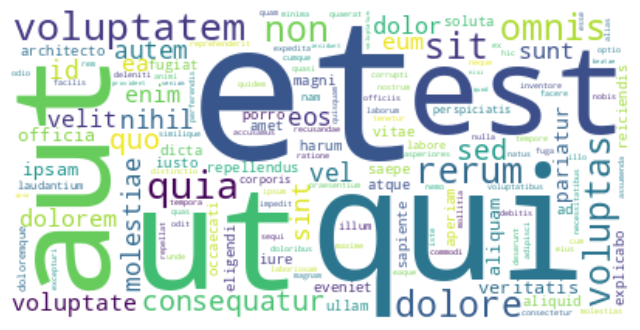

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Concatenate all comments into a single string
all_comments = " ".join(comment for comment in df_comments.comment)

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(all_comments)

# Display the word cloud
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to each comment to get sentiment scores
df_comments['sentiment_scores'] = df_comments['comment'].apply(sia.polarity_scores)

# Extract compound scores to a separate column
df_comments['compound_score'] = df_comments['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Classify sentiment as positive, neutral, or negative based on compound score
df_comments['sentiment'] = df_comments['compound_score'].apply(lambda c: 'positive' if c > 0.05 else ('negative' if c < -0.05 else 'neutral'))

# Display the first few rows of the DataFrame
df_comments.head()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count,sentiment_scores,compound_score,sentiment
0,0,1,unde at dolorem,2,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
1,1,2,quae ea ducimus,3,1,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
2,2,3,alias a voluptatum,5,1,2023-04-13 08:04:00,April 14,no,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
3,3,4,facere suscipit sunt,14,1,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral
4,4,5,totam eligendi quaerat,17,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral


In [6]:
from textblob import TextBlob

# Apply TextBlob to each comment to get sentiment polarity
df_comments['sentiment_polarity'] = df_comments['comment'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Classify sentiment as positive, neutral, or negative based on polarity
df_comments['sentiment'] = df_comments['sentiment_polarity'].apply(lambda p: 'positive' if p > 0 else ('negative' if p < 0 else 'neutral'))

# Display the first few rows of the DataFrame
df_comments.head()


,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count,sentiment_scores,compound_score,sentiment,sentiment_polarity
0,0,1,unde at dolorem,2,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
1,1,2,quae ea ducimus,3,1,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
2,2,3,alias a voluptatum,5,1,2023-04-13 08:04:00,April 14,no,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
3,3,4,facere suscipit sunt,14,1,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0
4,4,5,totam eligendi quaerat,17,1,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,neutral,0.0


In [7]:
# Let's see the overall sentiment distribution
sentiment_distribution = df_comments['sentiment'].value_counts()
sentiment_distribution


neutral     7411
negative      77
Name: sentiment, dtype: int64

In [8]:
# Fetch negative comments
negative_comments = df_comments[df_comments['sentiment'] == 'negative']

# Display a few negative comments
negative_comments_sample = negative_comments.sample(10)

negative_comments_sample


,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count,sentiment_scores,compound_score,sentiment,sentiment_polarity
2857,2857,2858,minus quam nisi,91,99,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
3013,3013,3014,sapiente minus deleniti,41,105,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
6785,6785,6786,eos expedita minus,98,232,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
1467,1467,1468,aut aut minus,24,51,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
375,375,376,aut vel minus,94,13,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
4786,4786,4787,molestiae magnam minus,85,164,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
4563,4563,4564,minus illum voluptatem,71,157,2023-04-13 08:04:00,April 14,yes,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
7150,7150,7151,ea rerum minus,84,245,2023-04-13 08:04:00,April 14,yes,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
5677,5677,5678,minus ut voluptatem,27,195,2023-04-13 08:04:00,April 14,no,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1
6174,6174,6175,facilis quidem minus,24,212,2023-04-13 08:04:00,April 14,yes,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,negative,-0.1


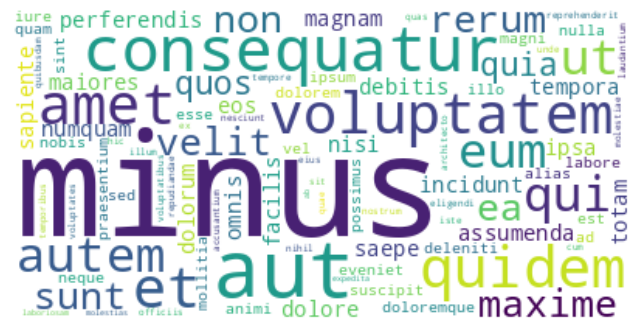

In [9]:
# Concatenate all negative comments into a single string
all_negative_comments = " ".join(comment for comment in negative_comments.comment)

# Create a word cloud
wordcloud_negative = WordCloud(background_color="white").generate(all_negative_comments)

# Display the word cloud
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()


In [10]:
# Calculate the proportions of positive, negative, and neutral comments that contain emojis
emoji_sentiment_proportions = df_comments.groupby('sentiment')['emoji used'].value_counts(normalize=True).unstack()

# Convert to percentages
emoji_sentiment_proportions = emoji_sentiment_proportions * 100

emoji_sentiment_proportions


emoji used,no,yes
sentiment,,
negative,40.259740,59.740260
neutral,50.101201,49.898799


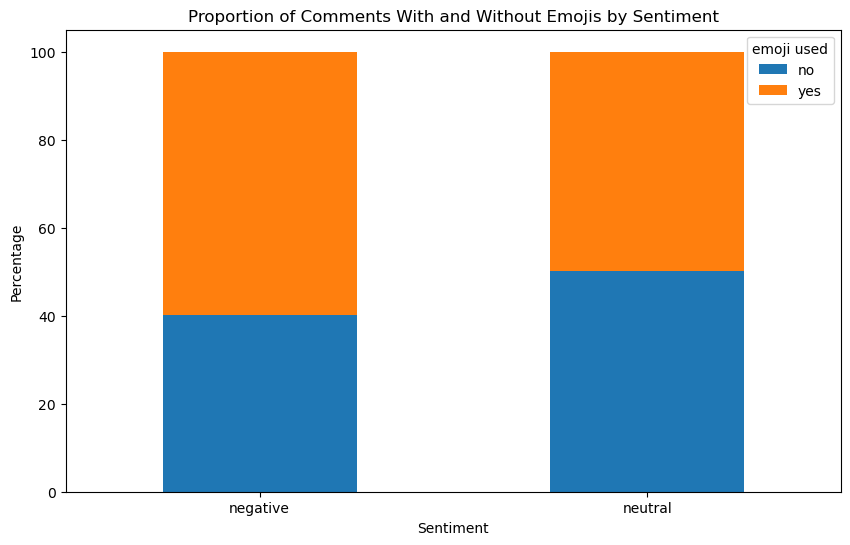

In [11]:
# Visualize the proportions
emoji_sentiment_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Comments With and Without Emojis by Sentiment')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()


In [12]:
# Count the number of comments per user
user_comment_counts = df_comments['User  id'].value_counts()

# Identify the 10 most active users
top_users = user_comment_counts.nlargest(10)

# For each of the top users, calculate the sentiment distribution of their comments
top_user_sentiments = df_comments[df_comments['User  id'].isin(top_users.index)].groupby('User  id')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Convert to percentages
top_user_sentiments = top_user_sentiments * 100

top_users, top_user_sentiments


(75    257
 36    257
 76    257
 71    257
 66    257
 57    257
 91    257
 41    257
 54    257
 24    257
 Name: User  id, dtype: int64,
 sentiment  negative    neutral
 User  id                      
 24         1.945525  98.054475
 36         0.778210  99.221790
 41         0.778210  99.221790
 54         0.389105  99.610895
 57         1.556420  98.443580
 66         1.556420  98.443580
 71         1.167315  98.832685
 75         0.389105  99.610895
 76         0.778210  99.221790
 91         0.389105  99.610895)

In [13]:
# Count the number of comments per photo
photo_comment_counts = df_comments['Photo id'].value_counts()

# Identify the 10 photos that received the most comments
top_photos = photo_comment_counts.nlargest(10)

# For each of the top photos, calculate the sentiment distribution of their comments
top_photo_sentiments = df_comments[df_comments['Photo id'].isin(top_photos.index)].groupby('Photo id')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Convert to percentages
top_photo_sentiments = top_photo_sentiments * 100

top_photos, top_photo_sentiments


(13     39
 157    39
 247    39
 8      38
 146    37
 29     36
 225    36
 143    36
 176    35
 196    35
 Name: Photo id, dtype: int64,
 sentiment  negative     neutral
 Photo id                       
 8          0.000000  100.000000
 13         5.128205   94.871795
 29         0.000000  100.000000
 143        2.777778   97.222222
 146        8.108108   91.891892
 157        2.564103   97.435897
 176        2.857143   97.142857
 196        2.857143   97.142857
 225        0.000000  100.000000
 247        0.000000  100.000000)

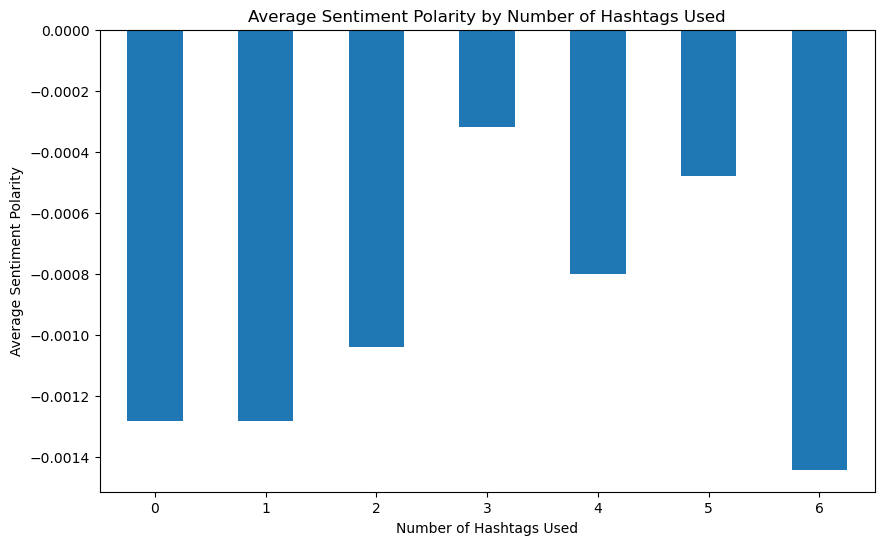

In [14]:
# Calculate the average sentiment polarity for comments with different numbers of hashtags
hashtag_sentiment = df_comments.groupby('Hashtags used count')['sentiment_polarity'].mean()

# Visualize the relationship
hashtag_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment Polarity by Number of Hashtags Used')
plt.ylabel('Average Sentiment Polarity')
plt.xlabel('Number of Hashtags Used')
plt.xticks(rotation=0)
plt.show()


In [15]:
# Calculate the length of each comment in terms of the number of words and characters
df_comments['word_count'] = df_comments['comment'].apply(lambda text: len(text.split()))
df_comments['char_count'] = df_comments['comment'].apply(len)

# Calculate the average length of comments for each sentiment category
average_lengths = df_comments.groupby('sentiment')[['word_count', 'char_count']].mean()

average_lengths


,word_count,char_count
sentiment,,
negative,3.0,18.467532
neutral,3.0,19.345567


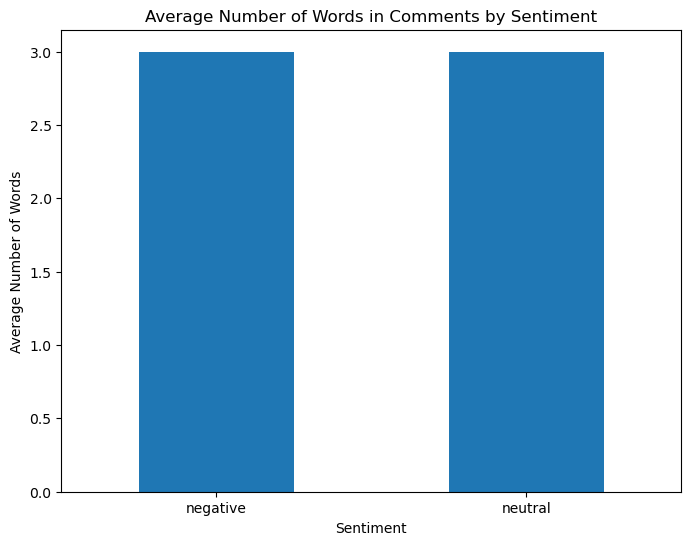

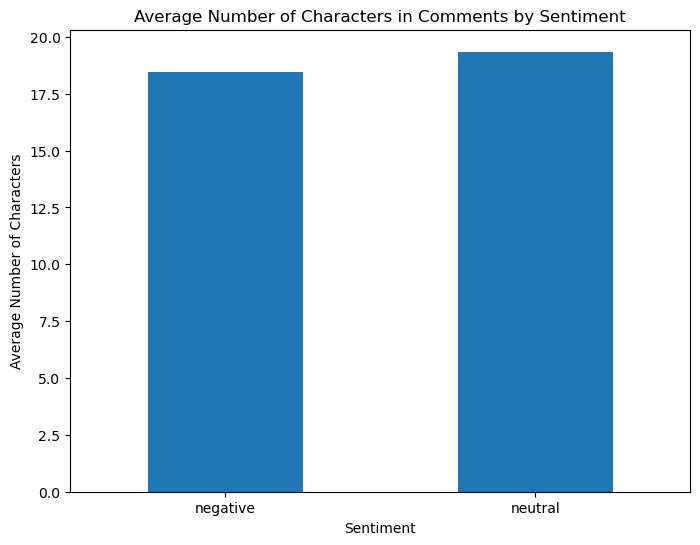

In [16]:
# Visualize the average number of words in comments for each sentiment category
average_lengths['word_count'].plot(kind='bar', figsize=(8, 6))
plt.title('Average Number of Words in Comments by Sentiment')
plt.ylabel('Average Number of Words')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

# Visualize the average number of characters in comments for each sentiment category
average_lengths['char_count'].plot(kind='bar', figsize=(8, 6))
plt.title('Average Number of Characters in Comments by Sentiment')
plt.ylabel('Average Number of Characters')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()
